In [8]:
from glue.ligolw import ligolw
from glue.ligolw import table
from glue.ligolw import lsctables
from glue.ligolw import ilwd
from glue.ligolw import utils as ligolw_utils
import numpy as np
import matplotlib.pyplot as plt
from pycbc import pnutils

from IPython.display import Image

In [1]:
with open("banksim.ini", 'a') as fout:
    fout.write("""\
[inspinj]
f-lower = 15 
i-distr = fixed
fixed-inc = 0
min-mass1 = 3. 
max-mass1 = 25. 
m-distr = componentMass 
disable-milkyway =
min-mass2 = 3. 
max-mass2 = 25. 
min-distance = 1000  
l-distr = random  
min-mtotal = 6
waveform = SEOBNRv4_ROM
aligned = 
enable-spin =
;max-mtotal = 
min-spin1 = 0 
max-spin1 = 0.8
min-spin2 = 0
max-spin2 = 0.8
max-distance = 1000 
d-distr = uniform 
gps-start-time = 1000000000 
gps-end-time =   1000010000
time-interval = 0. 
time-step = 1. 
seed = 3 

[executables]
banksim = /cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.16.10/bin/pycbc_banksim

[workflow]
accounting-group = ligo.dev.o3.cbc.explore.test
log-path = /home/isha.anantpurkar/AlignedSpins/NonSpinBank/logs/
;use-gpus =
bank-file = NonSpinBank.xml
injections-per-job = 50
templates-per-job = 500 

[banksim]
psd-model = aLIGOZeroDetHighPower 
template-approximant = EOBNRv2 
template-phase-order = 7 
;template-amplitude-order = 0 
;template-spin-order =
template-start-frequency = 20
signal-approximant = SEOBNRv4_ROM
signal-phase-order = 7
signal-sample-rate = 16384
signal-amplitude-order = 0 
;signal-spin-order = 0
signal-start-frequency = 20
filter-low-frequency = 20 
filter-sample-rate = 4096
filter-signal-length = 256
mchirp-window = 0.30
""")
    #mchirp-window =0.4/0.5

In [2]:
!ls

AlignedSpinInjections_ROM.ipynb  banksim.ini  logs  NonSpinBank.xml


! pycbc_make_banksim --conf banksim.ini

In [1]:
! tail -n10 banksim.dag.dagman.out

12/09/20 18:54:38 DAG status: 0 (DAG_STATUS_OK)
12/09/20 18:54:38 Of 436 nodes total:
12/09/20 18:54:38  Done     Pre   Queued    Post   Ready   Un-Ready   Failed
12/09/20 18:54:38   ===     ===      ===     ===     ===        ===      ===
12/09/20 18:54:38   436       0        0       0       0          0        0
12/09/20 18:54:38 0 job proc(s) currently held
12/09/20 18:54:38 DAGMan Runtime Statistics: [ EventCycleTimeAvg = 0.009679464583701275; EventCycleTimeCount = 235.0; EventCycleTimeMax = 0.6337709426879883; EventCycleTimeMin = 4.291534423828125E-05; EventCycleTimeStd = 0.06593353968056613; EventCycleTimeSum = 2.2746741771698; LogProcessCycleTimeAvg = 0.0005036741495132446; LogProcessCycleTimeCount = 16.0; LogProcessCycleTimeMax = 0.00074005126953125; LogProcessCycleTimeMin = 0.0002601146697998047; LogProcessCycleTimeStd = 0.0001388242678189795; LogProcessCycleTimeSum = 0.008058786392211914; SleepCycleTimeAvg = 5.004869395114006; SleepCycleTimeCount = 235.0; SleepCycleTimeMax =

In [9]:
import numpy as np

In [10]:
res = np.loadtxt('results.dat')

match = res[:,0]

tmass1 = res[:,1]
tmass2 = res[:,2]
tspin1x = res[:,3] 
tspin1y = res[:,4]
tspin1z = res[:,5]
tspin2x = res[:,6]
tspin2y = res[:,7]
tspin2z = res[:,8]
tmchirp, teta = pnutils.mass1_mass2_to_mchirp_eta(tmass1, tmass2)
tbeta, tsigma, tgamma = pnutils.get_beta_sigma_from_aligned_spins(teta, tspin1z, tspin2z)


imass1 = res[:,9]
imass2 = res[:,10]
ispin1x = res[:,11]
ispin1y = res[:,12]
ispin1z = res[:,13]
ispin2x = res[:,14]
ispin2y = res[:,15]
ispin2z = res[:,16]
imchirp, ieta = pnutils.mass1_mass2_to_mchirp_eta(imass1, imass2)
ibeta, isigma, igamma = pnutils.get_beta_sigma_from_aligned_spins(ieta, ispin1z, ispin2z)

In [11]:
! ls plots/

cum_hist.png		 m1-m2-mchirpdiff.png	  q-s2z-match90.png
hist-match-cum.png	 m1-m2-mchirpreldiff.png  q-s2z-match97.png
hist-match.png		 q-s1m-match.png	  q-s2z-match.png
hist-mchirp-diff.png	 q-s1z-match.png	  q-s2z-mchirpdiff.png
hist-mchirp-reldiff.png  q-s1z-mchirpdiff.png	  q-s2z-mchirpreldiff.png
inc-match.png		 q-s1z-mchirpreldiff.png  tm1-tm2-match.png
m1-m2-match.png		 q-s2m-match.png


In [11]:
from matplotlib import rc
rc('text', usetex=True)

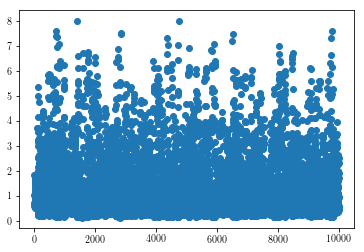

In [12]:
iq = imass1/imass2
tq = tmass1/tmass2

plt.scatter(range(len(iq)), iq)

Text(0.5,1,'Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: q vs $\\beta$')

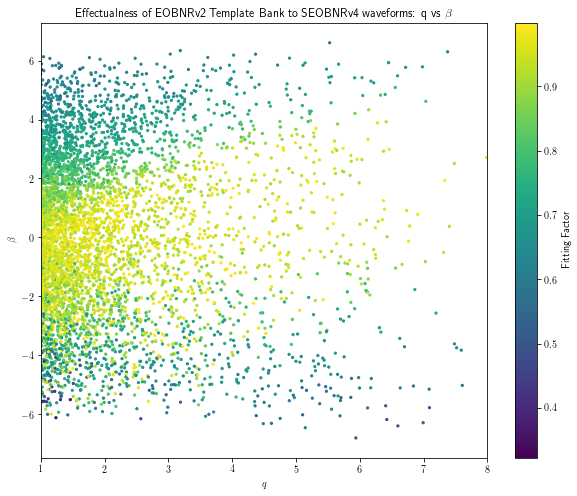

In [15]:
plt.figure(figsize = (10,8))
plt.scatter(iq, ibeta, s=5 ,c = match)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("$q$")
plt.xlim([1,8])
plt.ylabel("$$\\beta$$")
plt.title("Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: q vs $\\beta$")

Text(0.5,1,'Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms q vs $\\sigma$')

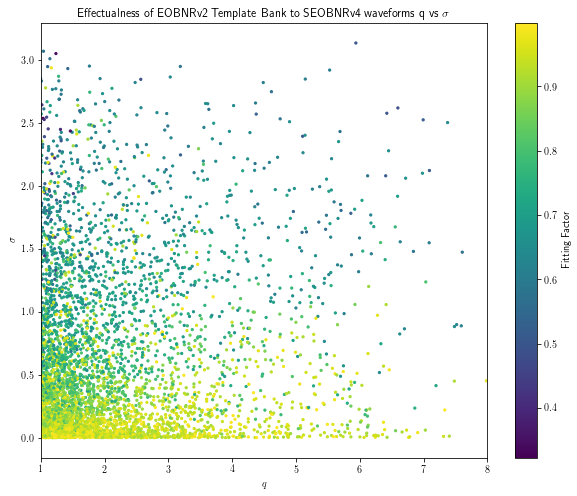

In [18]:
plt.figure(figsize = (10,8))
plt.scatter(iq, isigma, s=5 ,c = match)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("$q$")
plt.xlim([1,8])
plt.ylabel("$$\\sigma$$")
plt.title("Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms q vs $\\sigma$")

Text(0.5,1,'Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: q vs $\\gamma$')

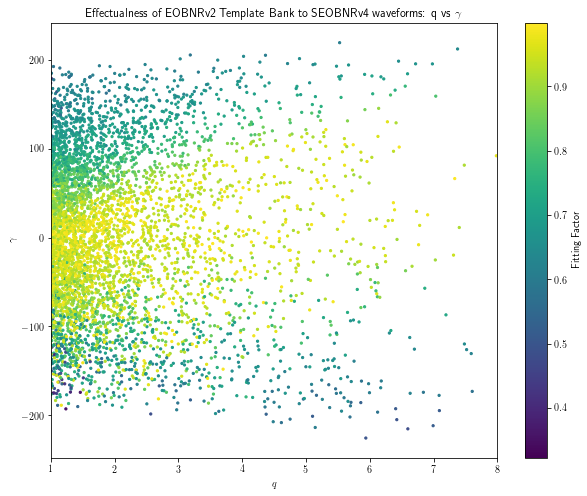

In [19]:
plt.figure(figsize = (10,8))
plt.scatter(iq, igamma, s=5 ,c = match)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("$q$")
plt.xlim([1,8])
plt.ylabel("$$\\gamma$$")
plt.title("Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: q vs $\\gamma$")

In [21]:
ichi_eff = (ispin1z*imass1 + ispin2z*imass2)/(imass1 + imass2)

Text(0.5,1,'Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: q vs $\\chi_{eff}$')

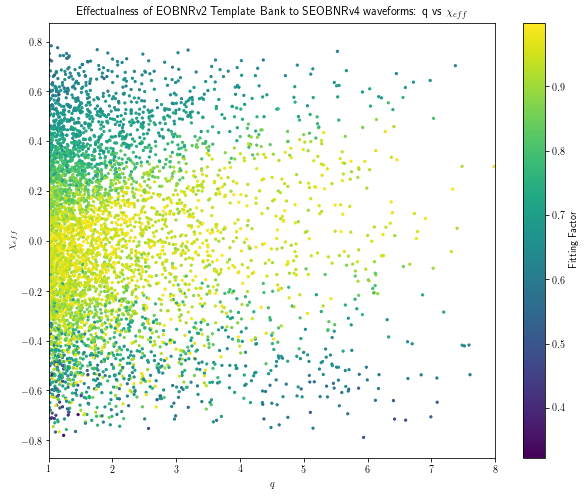

In [22]:
plt.figure(figsize = (10,8))
plt.scatter(iq, ichi_eff, s=5 ,c = match)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("$q$")
plt.ylabel("$$\\chi_{eff}$$")
plt.xlim([1,8])
plt.title("Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: q vs $\\chi_{eff}$")

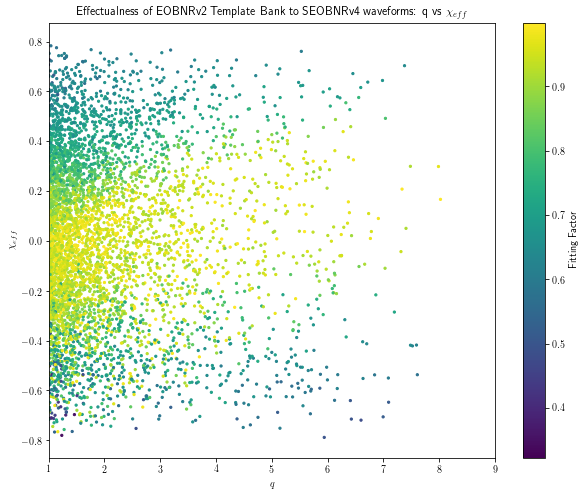

In [23]:
plt.figure(figsize = (10,8))
plt.scatter(iq, ichi_eff, s=5 ,c = match)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("$q$")
plt.ylabel("$$\\chi_{eff}$$")
plt.xlim([1,9])
plt.title("Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: q vs $\\chi_{eff}$")
plt.savefig("NonSpinBank_AlignedSpinSignals.png")

(1, 9)

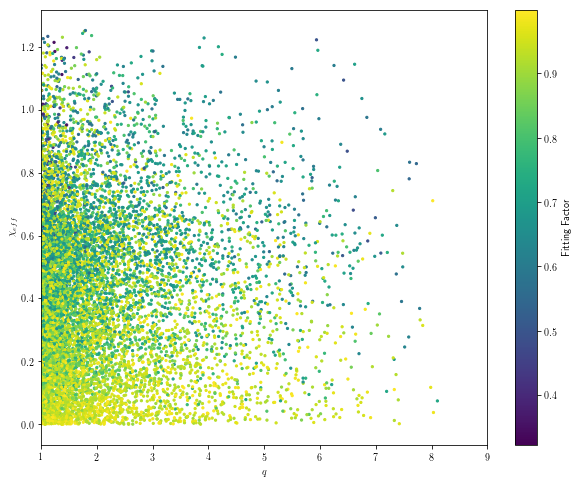

In [78]:
spinz_avg = ispin1z**2 + ispin2z**2
plt.figure(figsize = (10,8))
plt.scatter(iq, spinz_avg, s=5 ,c = match)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("$q$")
plt.ylabel("$$\\chi_{eff}$$")
plt.xlim([1,9])

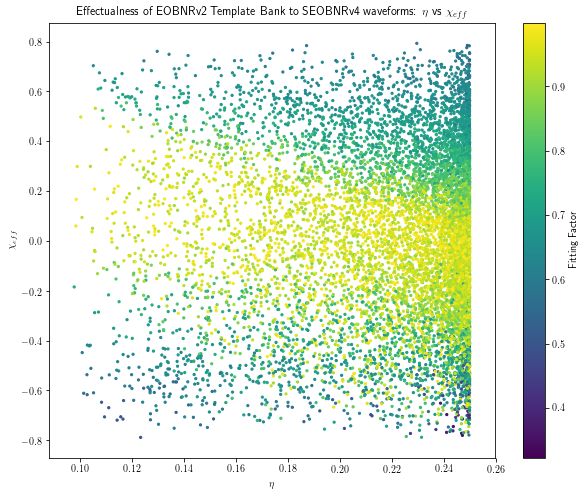

In [11]:
plt.figure(figsize = (10,8))
plt.scatter(ieta, ichi_eff, s=5 ,c = match)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("$\\eta$")
plt.ylabel("$$\\chi_{eff}$$")
plt.title("Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: $\\eta$ vs $\\chi_{eff}$")
plt.savefig("NonSpinBank_eta_chi.png")

Text(0.5,1,'Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: $q$ vs $\\chi_{1}$')

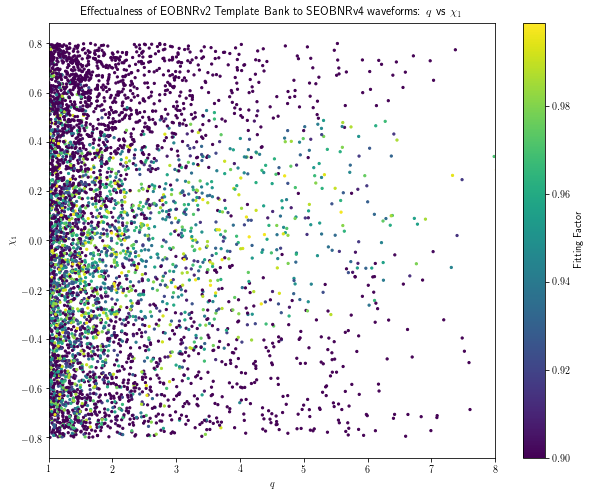

In [25]:
plt.figure(figsize = (10,8))
plt.scatter(iq, ispin1z, s=5 ,c = match, vmin=0.9)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("$q$")
plt.ylabel("$$\\chi_{1}$$")
plt.xlim([1,8])
plt.title("Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: $q$ vs $\\chi_{1}$")
#plt.savefig("NonSpinBank_eta_chi.png")

Text(0.5,1,'Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: $q$ vs $\\chi_{eff}$')

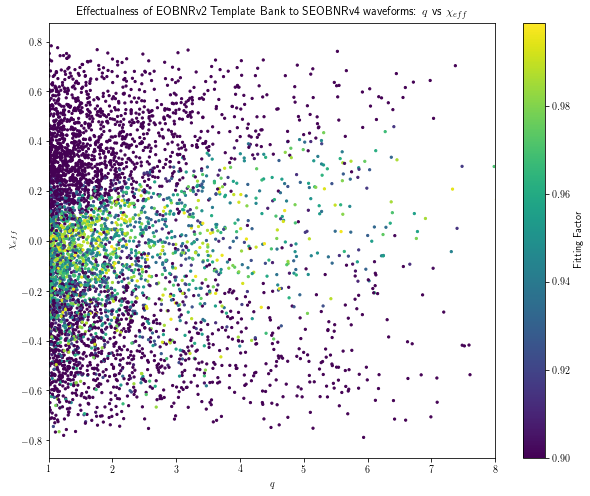

In [26]:
plt.figure(figsize = (10,8))
plt.scatter(iq, ichi_eff, s=5 ,c = match, vmin=0.9)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("$q$")
plt.ylabel("$$\\chi_{eff}$$")
plt.xlim([1,8])
plt.title("Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: $q$ vs $\\chi_{eff}$")
#plt.savefig("NonSpinBank_eta_chi.png")

Text(0.5,1,'Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: $M$ vs $\\chi_{eff}$')

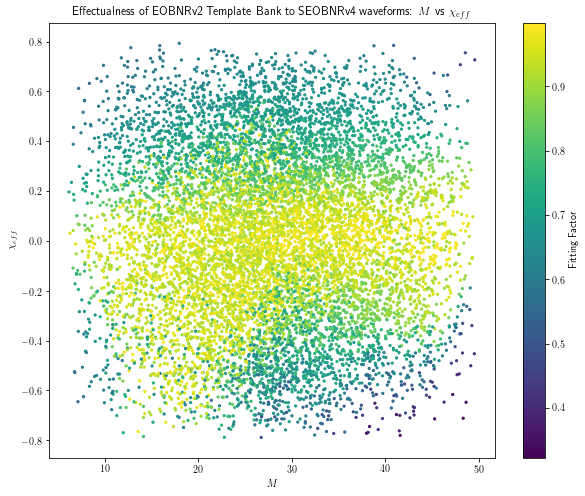

In [33]:
plt.figure(figsize = (10,8))
plt.scatter(imass1 + imass2, ichi_eff, s=5 ,c = match)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("$M$")
plt.ylabel("$$\\chi_{eff}$$")
#plt.xlim([1,8])
plt.title("Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: $M$ vs $\\chi_{eff}$")
#plt.savefig("NonSpinBank_eta_chi.png")

Text(0.5,1,'Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: $M$ vs $\\chi_{eff}$')

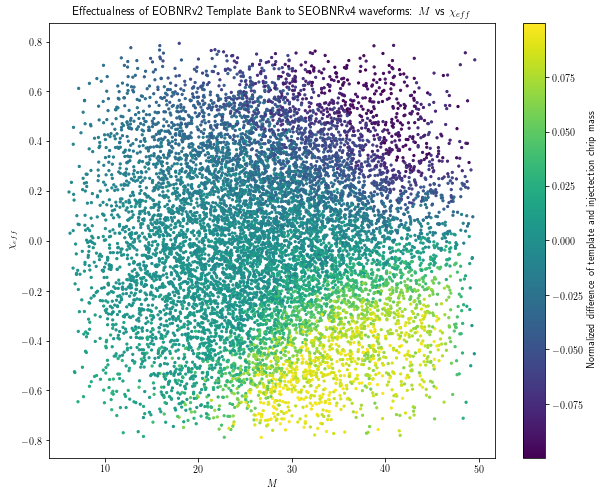

In [32]:
plt.figure(figsize = (10,8))
plt.scatter(imass1 + imass2, ichi_eff, s=5 ,c = (tmchirp-imchirp)/imchirp)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Normalized difference of template and injectection chrip mass")
plt.xlabel("$M$")
plt.ylabel("$$\\chi_{eff}$$")
#plt.xlim([1,8])
plt.title("Effectualness of EOBNRv2 Template Bank to SEOBNRv4 waveforms: $M$ vs $\\chi_{eff}$")
#plt.savefig("NonSpinBank_eta_chi.png")

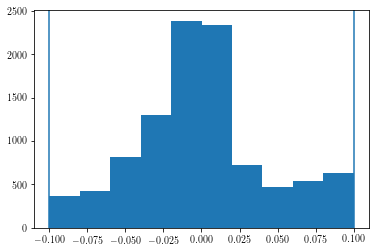

In [31]:
plt.hist((tmchirp-imchirp)/imchirp)
plt.axvline(0.1)
plt.axvline(-0.1)

(array([  12.,   23.,   51.,  147.,  679., 1373., 1149., 1067., 2140.,
        3359.]),
 array([0.32265 , 0.390262, 0.457874, 0.525486, 0.593098, 0.66071 ,
        0.728322, 0.795934, 0.863546, 0.931158, 0.99877 ]),
 <a list of 10 Patch objects>)

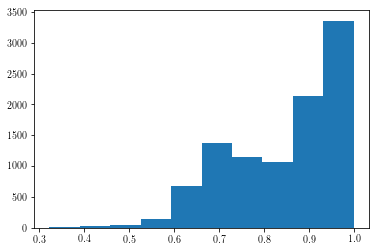

In [35]:
plt.hist(match)